In [0]:
%tensorflow_version 2.x

In [2]:
import tensorflow
tensorflow.__version__

'2.2.0'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import h5py

In [0]:
#Open the file as readonly
h5f = h5py.File("/content/drive/My Drive/Colab Notebooks/Neural Network/SVHN_single_grey1.h5", 'r')

In [0]:
#Load the training, test and validation set

X_train = h5f['X_train'][:]
X_test = h5f['X_test'][:]
X_val = h5f['X_val'][:]
y_train = h5f['y_train'][:]
y_test = h5f['y_test'][:]
y_val = h5f['y_val'][:]

In [0]:
#Close h5f file
h5f.close()

In [8]:
#Display shapes
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print("\n")
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(42000, 32, 32)
(18000, 32, 32)
(60000, 32, 32)


(42000,)
(18000,)
(60000,)


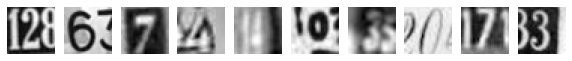

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [9]:
# visualizing the first 10 images in the training dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [0]:
#Reshape X data
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))

In [11]:
from keras.utils.np_utils import to_categorical

# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

Using TensorFlow backend.


In [12]:
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


In [0]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import Flatten

In [0]:
model = Sequential()

In [0]:
model.add(Dense(50, input_shape = (1024, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [0]:
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
history = model.fit(X_train, y_train, batch_size = 2, epochs = 10, verbose = 1)

Epoch 1/10
42000/42000 [==============================] - 29s 695us/step - loss: 2.3143 - accuracy: 0.1002
Epoch 2/10
42000/42000 [==============================] - 28s 668us/step - loss: 2.3080 - accuracy: 0.1040
Epoch 3/10
42000/42000 [==============================] - 28s 675us/step - loss: 2.3064 - accuracy: 0.0989
Epoch 4/10
42000/42000 [==============================] - 28s 672us/step - loss: 2.3051 - accuracy: 0.0996
Epoch 5/10
42000/42000 [==============================] - 31s 738us/step - loss: 2.3047 - accuracy: 0.1002
Epoch 6/10
42000/42000 [==============================] - 28s 675us/step - loss: 2.3046 - accuracy: 0.0984
Epoch 7/10
42000/42000 [==============================] - 29s 680us/step - loss: 2.3041 - accuracy: 0.1017
Epoch 8/10
42000/42000 [==============================] - 28s 670us/step - loss: 2.3043 - accuracy: 0.0986
Epoch 9/10
42000/42000 [==============================] - 28s 674us/step - loss: 2.3041 - accuracy: 0.0976
Epoch 10/10
42000/42000 [============

We notice very less accuracy and hardly any drop in loss

In [0]:
#Lets try relu activation function

model = Sequential()
model.add(Dense(50, input_shape = (1024, )))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [0]:
sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
history = model.fit(X_train, y_train, epochs = 10, verbose = 1)

Epoch 1/10
42000/42000 [==============================] - 2s 57us/step - loss: 3.0709 - accuracy: 0.0993
Epoch 2/10
42000/42000 [==============================] - 2s 55us/step - loss: 2.3027 - accuracy: 0.1020
Epoch 3/10
42000/42000 [==============================] - 2s 55us/step - loss: 2.3023 - accuracy: 0.1021
Epoch 4/10
42000/42000 [==============================] - 2s 55us/step - loss: 2.3022 - accuracy: 0.1020
Epoch 5/10
42000/42000 [==============================] - 2s 55us/step - loss: 2.3021 - accuracy: 0.1022
Epoch 6/10
42000/42000 [==============================] - 2s 54us/step - loss: 2.3022 - accuracy: 0.1022
Epoch 7/10
42000/42000 [==============================] - 2s 55us/step - loss: 2.3020 - accuracy: 0.1022
Epoch 8/10
42000/42000 [==============================] - 2s 55us/step - loss: 2.3020 - accuracy: 0.1023
Epoch 9/10
42000/42000 [==============================] - 2s 56us/step - loss: 2.3020 - accuracy: 0.1025
Epoch 10/10
42000/42000 [==============================

We notice very less accuracy and hardly any drop in loss

In [21]:
#Lets try kernel_initializer='he_uniform'

model = Sequential()
model.add(Dense(50, input_shape = (1024, ), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(Dense(50, kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(Dense(50, kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(Dense(50, kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(Dense(10, kernel_initializer='he_uniform'))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer = sgd, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=200, epochs = 50, verbose = 1)

Epoch 1/50
42000/42000 [==============================] - 1s 20us/step - loss: 840.5996 - accuracy: 0.0998
Epoch 2/50
42000/42000 [==============================] - 1s 19us/step - loss: 2.3026 - accuracy: 0.0993
Epoch 3/50
42000/42000 [==============================] - 1s 18us/step - loss: 2.3026 - accuracy: 0.1006
Epoch 4/50
42000/42000 [==============================] - 1s 19us/step - loss: 2.3026 - accuracy: 0.1019
Epoch 5/50
42000/42000 [==============================] - 1s 19us/step - loss: 2.3026 - accuracy: 0.1019
Epoch 6/50
42000/42000 [==============================] - 1s 19us/step - loss: 2.3026 - accuracy: 0.1019
Epoch 7/50
42000/42000 [==============================] - 1s 19us/step - loss: 2.3026 - accuracy: 0.1019
Epoch 8/50
42000/42000 [==============================] - 1s 20us/step - loss: 2.3026 - accuracy: 0.1019
Epoch 9/50
42000/42000 [==============================] - 1s 20us/step - loss: 2.3026 - accuracy: 0.1019
Epoch 10/50
42000/42000 [============================

We notice very less accuracy and hardly any drop in loss

In [25]:
from keras.layers import BatchNormalization

#Lets try Batch normalization
model = Sequential()
model.add(Dense(50, input_shape = (1024, )))
model.add(BatchNormalization())                    
model.add(Activation('relu'))    
model.add(Dense(50))
model.add(BatchNormalization())                    
model.add(Activation('relu'))    
model.add(Dense(50))
model.add(BatchNormalization())                    
model.add(Activation('relu'))    
model.add(Dense(50))
model.add(BatchNormalization())                    
model.add(Activation('relu'))  
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr = 0.007, momentum = 0.9)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 6s 143us/step - loss: 1.6302 - accuracy: 0.4376 - val_loss: 1.8408 - val_accuracy: 0.3717
Epoch 2/100
42000/42000 [==============================] - 6s 134us/step - loss: 1.1574 - accuracy: 0.6279 - val_loss: 1.4090 - val_accuracy: 0.5300
Epoch 3/100
42000/42000 [==============================] - 6s 132us/step - loss: 1.0295 - accuracy: 0.6729 - val_loss: 1.0421 - val_accuracy: 0.6648
Epoch 4/100
42000/42000 [==============================] - 6s 134us/step - loss: 0.9419 - accuracy: 0.6997 - val_loss: 1.0004 - val_accuracy: 0.6783
Epoch 5/100
42000/42000 [==============================] - 6s 132us/step - loss: 0.8867 - accuracy: 0.7154 - val_loss: 1.1588 - val_accuracy: 0.6134
Epoch 6/100
42000/42000 [==============================] - 6s 133us/step - loss: 0.8401 - accuracy: 0.7336 - val_loss: 0.9483 - val_accuracy: 0.6932
Epoch 7/100
42000/42000 [==============================]

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import numpy as np

pred = model.predict_classes(X_test, verbose=0)
y_test1 = np.argmax(y_test, axis=1)

#Classification Accuracy metrics

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test1, pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test1, pred, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test1, pred, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test1, pred, average='weighted')
print('F1 score: %f' % f1)



Accuracy: 0.821667
Precision: 0.825498
Recall: 0.821667
F1 score: 0.821743


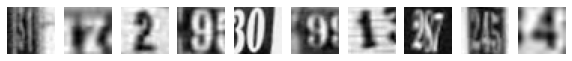

label for each of the above image: [1 7 2 9 0 9 1 8 4 4]
Prediction: 0.000000
Prediction: 7.000000
Prediction: 2.000000
Prediction: 9.000000
Prediction: 0.000000
Prediction: 9.000000
Prediction: 1.000000
Prediction: 3.000000
Prediction: 1.000000
Prediction: 4.000000


In [27]:
#Lets predict images from test dataset
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_test1[0:10]))

for i in range(10):
    pred = model.predict_classes(X_test[[i],:])
    print('Prediction: %f' % pred)